In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
path = "table pour machine learning test.csv"
path_2 = "data_processed.csv"
Data = pd.read_csv(path,skiprows=1)



Data = Data.drop('!6',axis=1)
values_to_keep =  ["VALN", "ZCB", "EQ", "RE","ILZCB","INFLN"]
Data =  Data[Data['CLASS'].isin(values_to_keep)].reset_index(drop=True)

print(Data["CLASS"].unique())



['VALN' 'ZCB' 'INFLN' 'ILZCB' 'EQ' 'RE']


In [3]:
df = Data

df_melted = df.melt(id_vars=['SIMULATION', 'ECONOMY', 'CLASS', 'MEASURE', 'TERM'], 
                    var_name='YEAR', 
                    value_name='PRICE')

# Create the columns you want directly during melting
df_melted['Sim'] = df_melted['CLASS'].astype(str) + '-' + df_melted['MEASURE'].astype(str) + '-' + df_melted['TERM'].astype(str) + '-' + df_melted['YEAR'].astype(str)

# Pivot the data
df_pivoted = df_melted.pivot(index='SIMULATION', columns='Sim', values='PRICE')

# Reset the index and remove index name

df_pivoted["EQ-RNY_PC-0-2069"]


SIMULATION
1    3.402847
2    1.662429
3    1.289881
Name: EQ-RNY_PC-0-2069, dtype: float64

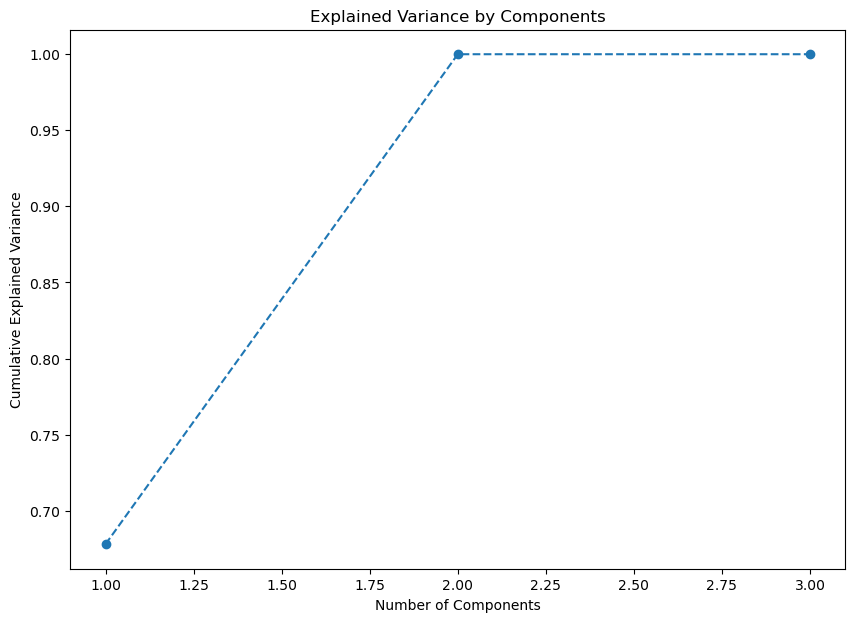

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Standardize the data
scaler = MinMaxScaler()
df_standardized = scaler.fit_transform(df_pivoted)

# 2. Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_standardized)

# Store the results in a DataFrame
df_pca = pd.DataFrame(data = principal_components)



plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [13]:
print(pca.explained_variance_ratio_)

[6.77945035e-01 3.22054965e-01 2.41901683e-32]
